In [5]:
# import or define evaluate_classification, plot_decision_boundary, plot_data

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    
    return accuracy, report, confusion


In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [24]:
def load_dataset(filename, data_columns, target_column):
    """Load dataset from CSV file.

    Args:
        filename (str): Path to CSV file.
        data_columns (list): List of column names for data.
        target_column (str): Name of target column.

    Returns:
        tuple: Tuple containing data and target.
    """
    
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X.values, y.values

In [6]:
class LogisticRegression:
    """Logistic Regression Classifier."""
    def __init__(self, standardize=True, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):
        """Initialize Logistic Regression Classifier.
        
        Args:
            standardize (bool): Whether to standardize the data.
            learning_rate (float): Learning rate for gradient descent.
            max_iter (int): Maximum number of iterations for gradient descent.
            tol (float): Tolerance for gradient descent.
            verbose (bool): Whether to print cost at each 100th iteration.
        """
        self.standardize = standardize
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def normalize(self, X):
        """Normalize the data.
        
        Args:
            X (array): Data to normalize.
        
        Returns:
            tuple: Tuple containing normalized data, mean, and standard deviation.
        """
        # TODO: Implement
        mean = np.mean(X,axis=0)
        std = np.std(X,axis=0)
        X_new = (X-mean)/std
        return X_new, mean, std

    def add_intercept(self, X):
        """Add intercept term to the data.
        
        Args:
            X (array): Data to add intercept term.
        
        Returns:
            array: Data with intercept term."""
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new

    def sigmoid(self, z):
        """Sigmoid function.
        
        Args:
            z (array): Input to sigmoid function.
            
        Returns:
            array: Output of sigmoid function."""
        # TODO: Implement
        h = 1/(1+np.exp(z*-1))
        return h
    
    def hypothesis(self, X, theta):
        """Hypothesis function.
        
        Args:
            X (array): Data.
            theta (array): Parameters.
        
        Returns:
            array: Output of hypothesis function."""
        # TODO: Implement
        z = X.dot(theta)
        return self.sigmoid(z)

    def cost_function(self, X, y, theta):
        """Cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            float: Cost of hypothesis function."""
        # TODO: Implement
        cost = sum( (1-y)*np.log(1-self.hypothesis(X,theta))-(-1)*y*np.log(self.hypothesis(X,theta)))/X.shape[0]
        return cost

    def gradient(self, X, y, theta):
        """Gradient of cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            array: Gradient of cost function."""
        # TODO: Implement
        grad = X.T.dot(self.hypothesis(X,theta) - y)/X.shape[0]
        return grad

    def gradient_descent(self, X, y, theta):
        """Gradient descent algorithm.

        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
        
        Returns:
            tuple: Tuple containing parameters and costs."""
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):
            # TODO: Implement
            grad = self.gradient(X,y,theta)
            theta = theta - self.learning_rate*grad
            cost = self.cost_function(X,y,theta)
            
            costs.append(cost)

            if i % 100 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):
        """Fit the model.

        Args:
            X (array): Data.
            y (array): Target."""
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X)
        X_new = self.add_intercept(X_new)

        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        """Predict the target.

        Args:
            X (array): Data.

        Returns:
            array: Predicted target."""
        # TODO: Implement
        if self.standardize:
            X_new = (X - self.mean) / self.std
        X_new = self.add_intercept(X_new)
        y_pred = np.where(self.hypothesis(X_new, self.theta) >= 0.5, 1, 0)
        return y_pred

    def predict_proba(self, X):
        """Predict the probability of target.
        
        Args:
            X (array): Data.
        
        Returns:
            array: Predicted probability of target."""
        # TODO: Implement
        if self.standardize:
            X_new = (X - self.mean) / self.std
        X_new = self.add_intercept(X_new)
        h = self.hypothesis(X_new, self.theta)
        return np.column_stack((1-h, h))

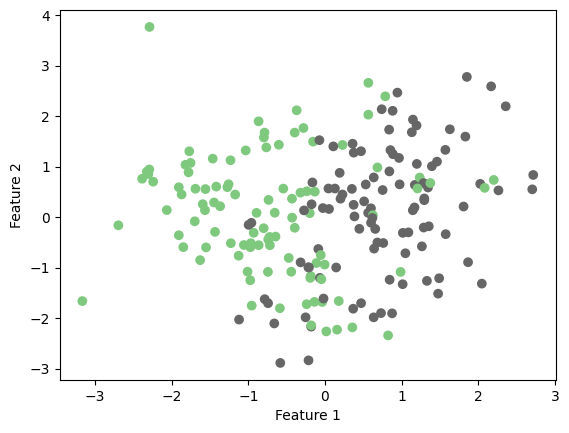

In [14]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)

In [10]:
lr.fit(X_train, y_train)

Iteration 0 Cost: -0.6931471805599464
Iteration 100 Cost: -0.6136961768033278
Iteration 200 Cost: -0.5647623643019382
Iteration 300 Cost: -0.5331283274592201
Iteration 400 Cost: -0.511661489958823
Iteration 500 Cost: -0.49647728792505647
Converged at iteration 585


In [11]:
y_test_pred = lr.predict(X_test)

Accuracy: 
0.85
Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.80      0.89      0.84        18

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40

Confusion: 
[[18  4]
 [ 2 16]]


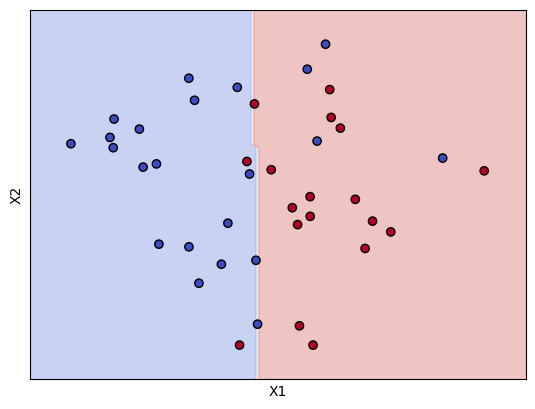

In [21]:
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

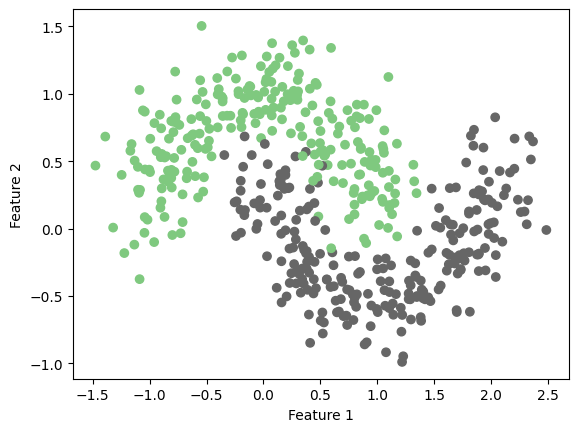

In [22]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plot_data(X, y)

Iteration 0 Cost: -0.6931471805599467
Iteration 100 Cost: -0.541534324316229
Iteration 200 Cost: -0.46061214669197326
Iteration 300 Cost: -0.41321437060383126
Iteration 400 Cost: -0.3829955613575734
Iteration 500 Cost: -0.362398347660755
Iteration 600 Cost: -0.34761780830941824
Converged at iteration 686
Accuracy: 
0.87
Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        43
           1       0.94      0.82      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100

Confusion: 
[[40  3]
 [10 47]]


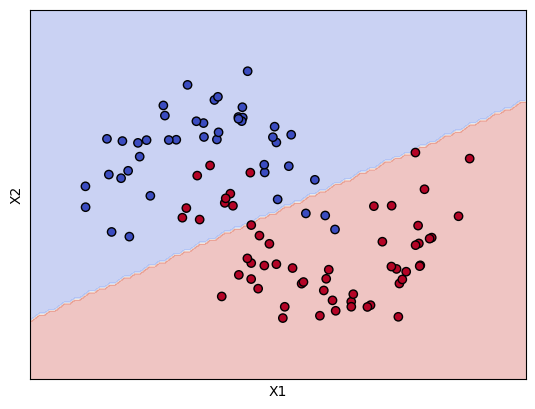

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

Evaluate the above LogisticRegression class on datasets sats.csv and tests.csv. Consider using polynomial features when applicable.

In [27]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_dataset('sats.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


Iteration 0 Cost: -0.6931471805599456
Iteration 100 Cost: -0.5689949249776796
Iteration 200 Cost: -0.4902112656368507
Iteration 300 Cost: -0.43734428956378457
Iteration 400 Cost: -0.3998055922867808
Iteration 500 Cost: -0.3718465249133423
Iteration 600 Cost: -0.35020589166548044
Iteration 700 Cost: -0.33293265167412023
Iteration 800 Cost: -0.3187994531602904
Iteration 900 Cost: -0.3069992931109112
Converged at iteration 951
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion: 
[[7 1]
 [3 9]]


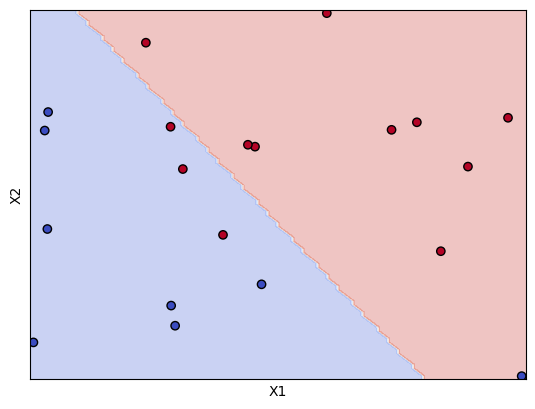

In [28]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()